In [1]:
import acquire
import prepare
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### acquiring and preparing zillow data

In [2]:
df = acquire.get_zillow_data()

Using cached csv


In [3]:
#checking shape to make sure I have the appropriate amount 
df.shape

(52441, 7)

In [4]:
# checking for null amounts
df.isnull().sum()

bedroomcnt                        0
bathroomcnt                       0
calculatedfinishedsquarefeet     82
lotsizesquarefeet               369
taxvaluedollarcnt                 1
yearbuilt                       116
fips                              0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,52441.0,3.300681,0.949094,0.0,3.0,3.0,4.00,14.0
bathroomcnt,52441.0,2.299403,1.022772,0.0,2.0,2.0,3.00,18.0
calculatedfinishedsquarefeet,52359.0,1922.890754,1004.365838,128.0,1268.0,1659.0,2306.00,21929.0
lotsizesquarefeet,52072.0,11339.624078,86747.634061,236.0,5583.0,6840.5,8798.25,6971010.0
taxvaluedollarcnt,52440.0,529688.163921,751894.553363,1000.0,193747.5,373612.0,619301.25,49061236.0
yearbuilt,52325.0,1963.393884,23.133571,1878.0,1950.0,1961.0,1979.00,2016.0
fips,52441.0,6049.132149,21.029067,6037.0,6037.0,6037.0,6059.00,6111.0


## Takeaway
- Some extreme outliers in the dataframe


In [6]:
# user friendly column names

df = df.rename( columns = {'bedroomcnt': 'bedroom',
                           'bathroomcnt': 'bathroom',
                           'calculatedfinishedsquarefeet':'square_ft',
                           'lotsizesquarefeet': 'lot_size',
                           'taxvaluedollarcnt': 'tax_value',
                           'yearbuilt': 'year_built'
                          })

In [7]:
df.columns.tolist()

['bedroom',
 'bathroom',
 'square_ft',
 'lot_size',
 'tax_value',
 'year_built',
 'fips']

In [8]:
# clean all values and replace any missing

df= df.replace(r'^\s*$', np.nan, regex = True)

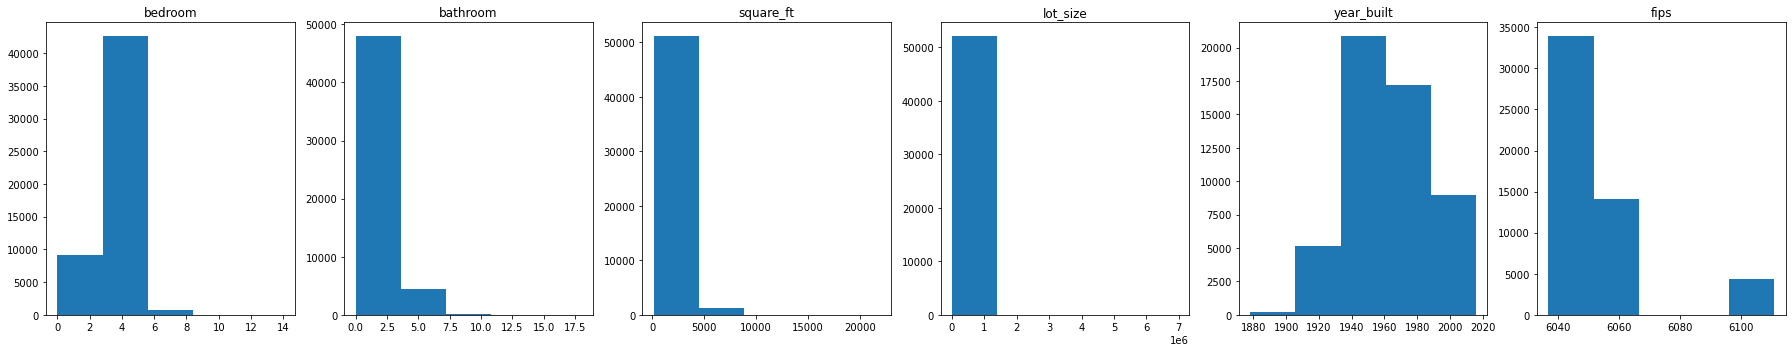

In [9]:
# list of numeric columns
cols = [col for col in df.columns if col not in ['tax_value']]

# figsize width to height
plt.figure(figsize=(25, 5))

# loop to iterate over columns
for i, col in enumerate(cols):
        
        # i starts at 0 but plot numbers should start at 1
        plot_number = i + 1
        
        # create subplot
        plt.subplot(1, len(cols), plot_number)
        
        # create title with the column name
        plt.title(col)
        
        # display a histogram for each of the columns            
        df[col].hist(bins=5)
        
        # Hide gridlines.
        plt.grid(False)
         
        # turn off scientific notation
        plt.ticklabel_format(useOffset=False)
    
plt.tight_layout()
plt.show()

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/an

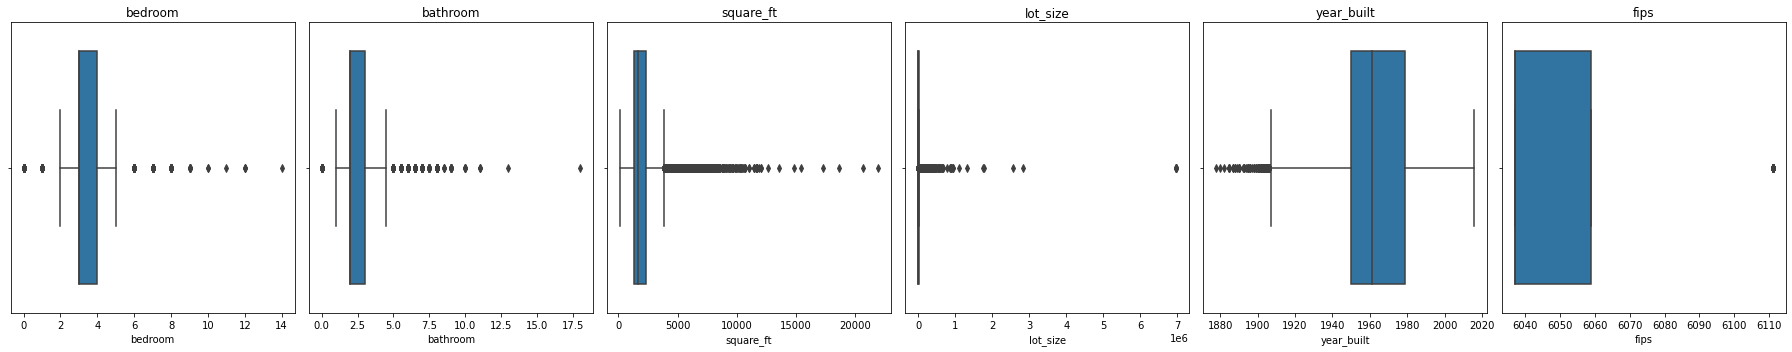

In [10]:
# Visualize Boxplot/Skew


# list of numeric columns
cols = [col for col in df.columns if col not in ['tax_value']]

# figsize width to height
plt.figure(figsize=(25, 5))

# loop to iterate over columns
for i, col in enumerate(cols):
        
        # i starts at 0 but plot numbers should start at 1
        plot_number = i + 1
        
        # create subplot
        plt.subplot(1, len(cols), plot_number)
        
        # create title with the column name
        plt.title(col)
        
        # display a histogram for each of the columns            
        sns.boxplot(df[col])
        
        # Hide gridlines.
        plt.grid(False)
         
      
    
plt.tight_layout()
plt.show()

## Takeaway
- data cannot give meaning with visualizations because of the outliers

In [52]:
# check the values

df.fips.value_counts()

los_angeles    33910
orange         14136
ventura         4395
Name: fips, dtype: int64

In [12]:
# replacing fips values with more descriptive values

df.fips = df.fips.replace({6037: 'los_angeles', 6059: 'orange', 6111: 'ventura'})

In [13]:
# recheck the values

df.fips.astype('object')

0             orange
1            ventura
2             orange
3        los_angeles
4        los_angeles
            ...     
52436    los_angeles
52437    los_angeles
52438        ventura
52439    los_angeles
52440    los_angeles
Name: fips, Length: 52441, dtype: object

In [14]:
# creat dummy columns for fips so it will be easier to evaluate later

dummy_df = pd.get_dummies(df['fips'])
df = pd.concat([df, dummy_df], axis = 1)

In [15]:
df.head()

,bedroom,bathroom,square_ft,lot_size,tax_value,year_built,fips,los_angeles,orange,ventura
0,4.0,3.5,3100.0,4506.0,1023282.0,1998.0,orange,0,1,0
1,2.0,1.0,1465.0,12647.0,464000.0,1967.0,ventura,0,0,1
2,3.0,2.0,1243.0,8432.0,564778.0,1962.0,orange,0,1,0
3,4.0,3.0,2376.0,13038.0,145143.0,1970.0,los_angeles,1,0,0
4,4.0,3.0,2962.0,63000.0,773303.0,1950.0,los_angeles,1,0,0


In [16]:
# create column that shows age values calulated from the yearbuilt column
df['age'] = 2022 - df.year_built

In [17]:
df.head()

,bedroom,bathroom,square_ft,lot_size,tax_value,year_built,fips,los_angeles,orange,ventura,age
0,4.0,3.5,3100.0,4506.0,1023282.0,1998.0,orange,0,1,0,24.0
1,2.0,1.0,1465.0,12647.0,464000.0,1967.0,ventura,0,0,1,55.0
2,3.0,2.0,1243.0,8432.0,564778.0,1962.0,orange,0,1,0,60.0
3,4.0,3.0,2376.0,13038.0,145143.0,1970.0,los_angeles,1,0,0,52.0
4,4.0,3.0,2962.0,63000.0,773303.0,1950.0,los_angeles,1,0,0,72.0


In [18]:
#check dtypes and make adjustments in my wrangle.py notebook
df.dtypes

bedroom        float64
bathroom       float64
square_ft      float64
lot_size       float64
tax_value      float64
year_built     float64
fips            object
los_angeles      uint8
orange           uint8
ventura          uint8
age            float64
dtype: object

In [19]:
df.shape

(52441, 11)

In [20]:
dfw = wrangle.clean_zillow_data()

Using cached csv


In [21]:
#checking df after adjustments have been made to the clean zillow data function
dfw.head()

,bedroom,bathroom,square_ft,lot_size,tax_value,year_built,fips,age,los_angeles,orange,ventura
0,4,3,3100,4506.0,1023282,1998.0,orange,24,0,1,0
2,3,2,1243,8432.0,564778,1962.0,orange,60,0,1,0
5,2,1,738,4214.0,218552,1922.0,los_angeles,100,1,0,0
7,4,3,2540,10384.0,430108,1999.0,los_angeles,23,1,0,0
9,3,2,1371,3445.0,198054,2004.0,ventura,18,0,0,1


In [22]:
# recheck df and notice how many rows were dropped after scaling
dfw.shape

(40549, 11)

In [23]:
dfw.dtypes

bedroom          int64
bathroom         int64
square_ft        int64
lot_size       float64
tax_value        int64
year_built     float64
fips            object
age              int64
los_angeles      uint8
orange           uint8
ventura          uint8
dtype: object

In [24]:
# re-checking my dataframe and seeing outliers removed

dfw.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroom,40549.0,3.196947,0.781355,2.0,3.0,3.0,4.0,5.0
bathroom,40549.0,2.016449,0.698687,1.0,2.0,2.0,2.0,4.0
square_ft,40549.0,1657.756443,581.798749,152.0,1227.0,1540.0,1991.0,3557.0
lot_size,40549.0,6625.224962,2046.069104,1292.0,5400.0,6500.0,7678.0,12510.0
tax_value,40549.0,363589.195541,235057.678731,3254.0,171827.0,331810.0,508446.0,1082260.0
year_built,40549.0,1962.127722,20.981262,1912.0,1950.0,1959.0,1976.0,2014.0
age,40549.0,59.872278,20.981262,8.0,46.0,63.0,72.0,110.0
los_angeles,40549.0,0.642655,0.479224,0.0,0.0,1.0,1.0,1.0
orange,40549.0,0.274803,0.446421,0.0,0.0,0.0,1.0,1.0
ventura,40549.0,0.082542,0.275192,0.0,0.0,0.0,0.0,1.0



def remove_outliers(df, k, col_list):
    ''' this function take in a dataframe, k value, and specified columns 
    within a dataframe and then return the dataframe with outliers removed
    '''
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

df2 = remove_outliers(df, 1.5, ['bedroom', 'bathroom', 'square_ft','lot_size', 'tax_value', 'age', 'year_built'])

 removing the outliers removes about 7k rows.

df.shape

df2.describe().T

### Takeaways
- There were some outliers that made initial visualizations difficult. 
- Outliers needed to be removed.

### Exploration
What drives property tax values


In [25]:
train, validate, test = prepare.wrangle_zillow()

Using cached csv


In [26]:
train.shape, validate.shape, test.shape

((22707, 11), (9732, 11), (8110, 11))

In [27]:
train.isnull().sum()

bedroom        0
bathroom       0
square_ft      0
lot_size       0
tax_value      0
year_built     0
fips           0
age            0
los_angeles    0
orange         0
ventura        0
dtype: int64

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22707 entries, 3458 to 3453
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedroom      22707 non-null  int64  
 1   bathroom     22707 non-null  int64  
 2   square_ft    22707 non-null  int64  
 3   lot_size     22707 non-null  float64
 4   tax_value    22707 non-null  int64  
 5   year_built   22707 non-null  float64
 6   fips         22707 non-null  object 
 7   age          22707 non-null  int64  
 8   los_angeles  22707 non-null  uint8  
 9   orange       22707 non-null  uint8  
 10  ventura      22707 non-null  uint8  
dtypes: float64(2), int64(5), object(1), uint8(3)
memory usage: 1.6+ MB


In [29]:
train.head()

,bedroom,bathroom,square_ft,lot_size,tax_value,year_built,fips,age,los_angeles,orange,ventura
3458,3,2,1794,6148.0,609150,1952.0,los_angeles,70,1,0,0
13340,4,2,2118,5200.0,589831,1973.0,orange,49,0,1,0
19898,2,1,1808,8025.0,74101,1948.0,los_angeles,74,1,0,0
30173,2,1,1401,6240.0,268861,1940.0,los_angeles,82,1,0,0
16842,2,1,1138,5829.0,234048,1923.0,ventura,99,0,0,1


In [30]:
continuous_cols = ['bedroom', 'bathroom', 'square_ft', 'lot_size', 'year_built', 'age']

In [49]:
# create a function that takes in a dataframe
def plot_variable_pairs(df):
    # plot the columns in a pairplot
    sns.pairplot(df, kind = 'reg', corner = True, plot_kws={'line_kws':{'color':'orange'}})
    plt.show()

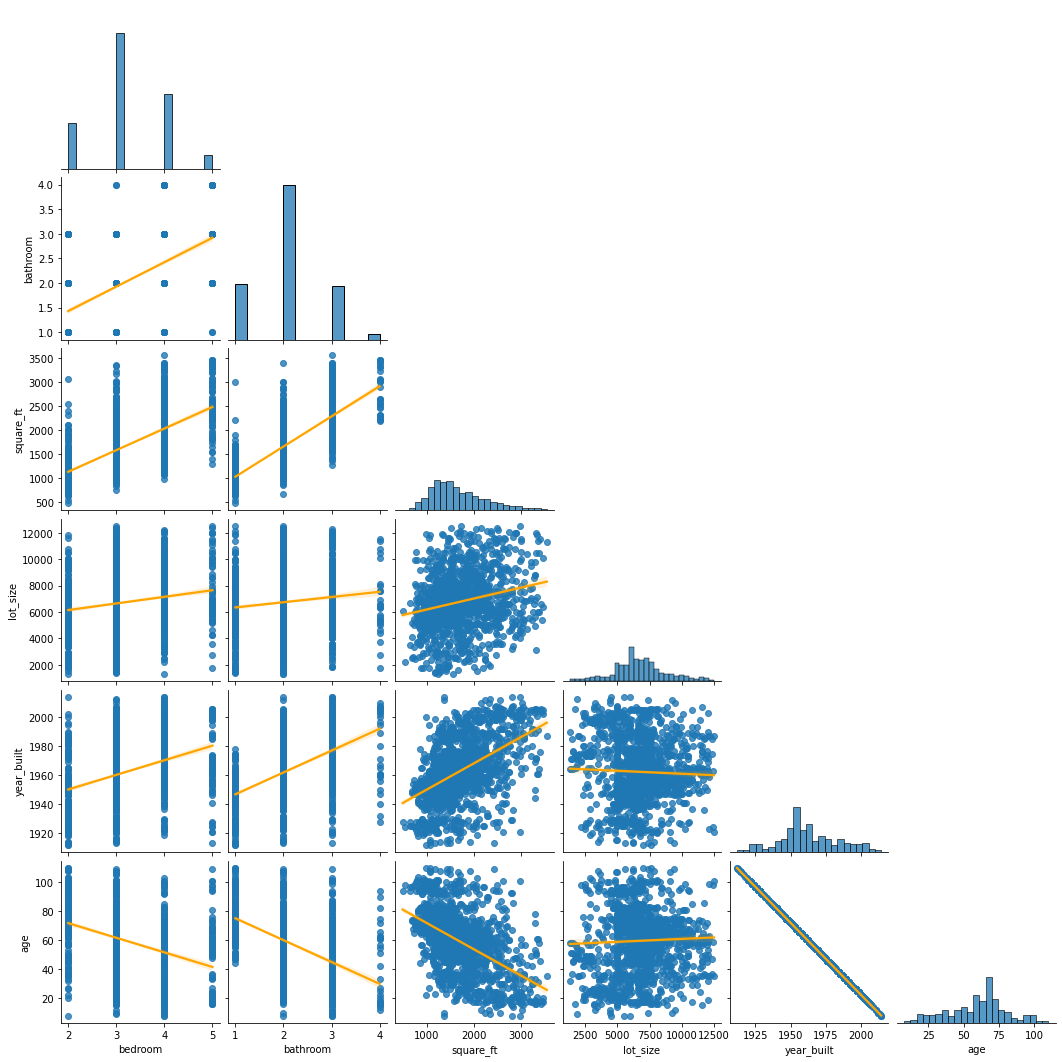

In [50]:
plot_variable_pairs(train[continuous_cols].sample(1500))

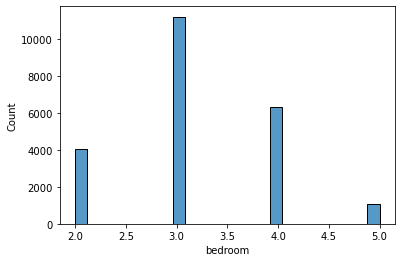

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


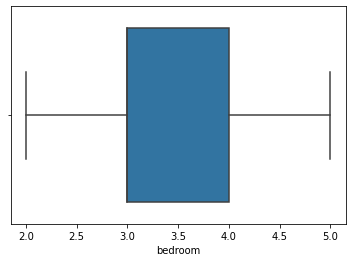

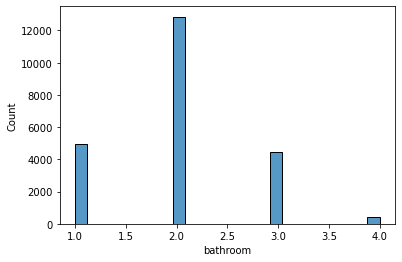

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


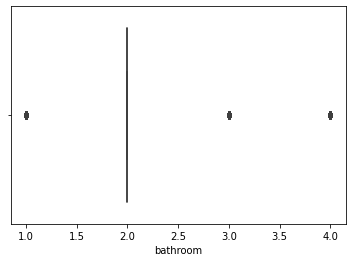

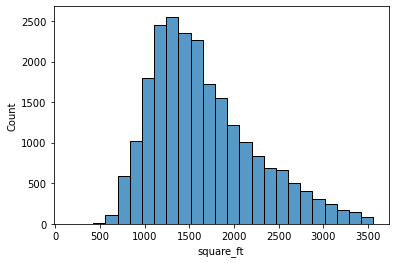

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


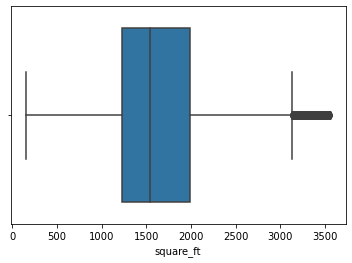

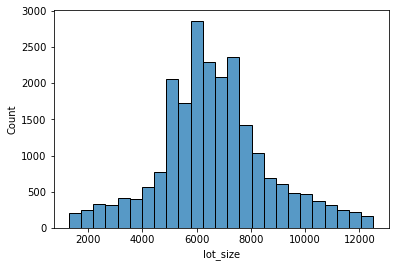

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


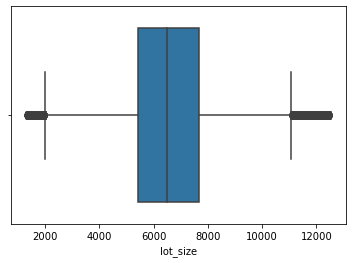

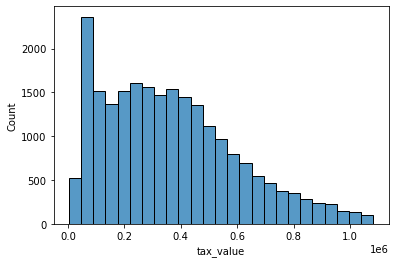

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


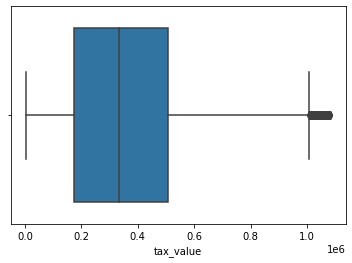

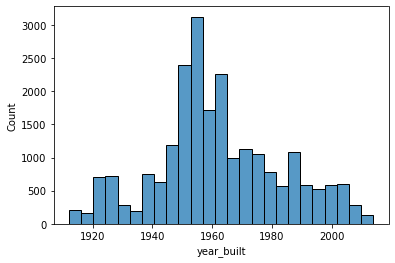

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


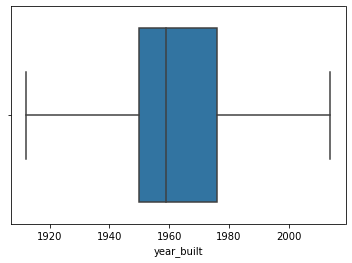

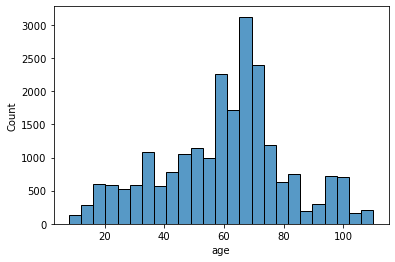

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


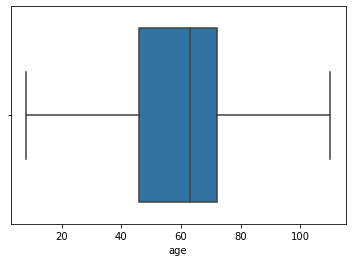

In [34]:
# check distribution of numerical columns
num_cols = [col for col in df if col not in ['fips','los_angeles', 'ventura', 'orange']]
for col in num_cols: 
    sns.histplot(train[col], log_scale=[False,False], bins=25)
    plt.show()
    sns.boxplot(train[col])
    plt.show()